<a href="https://colab.research.google.com/github/adeeeeelahmed/Codexcue/blob/main/HyperParameter_Tuning_of_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Model Performance:
Accuracy: 0.961352657004831
Precision: 0.9580418596800511
Recall: 0.9466088212705263
F1-Score: 0.952094422587364

Confusion Matrix:
[[725  14]
 [ 26 270]]


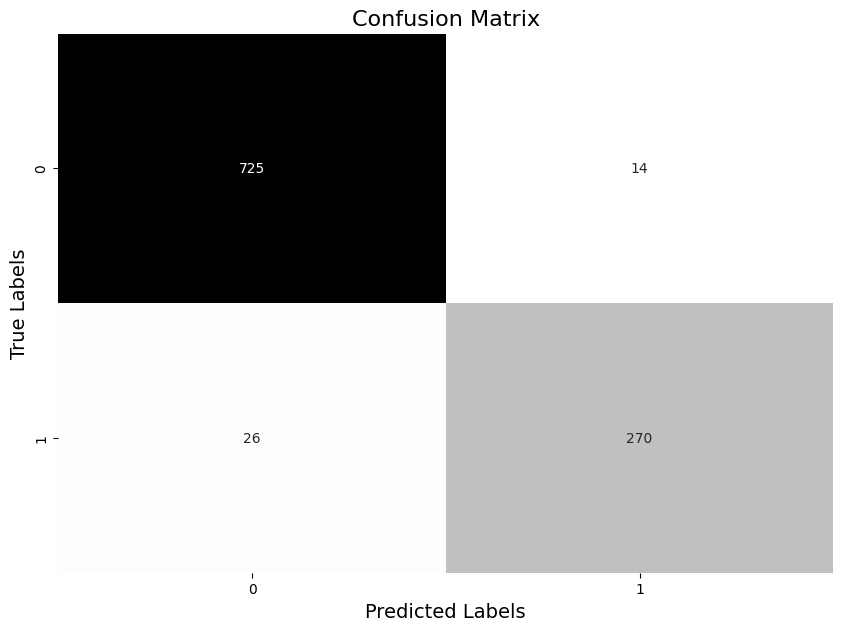

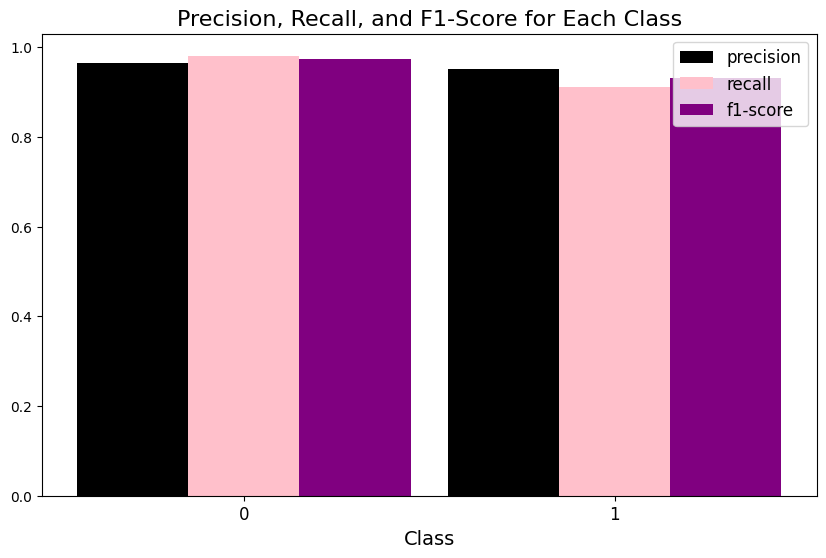

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

data = pd.read_csv('emails.csv')

if 'Email No.' in data.columns:
    data.drop(columns=['Email No.'], inplace=True)

if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)

if 'Prediction' not in data.columns:
    raise ValueError("'Prediction' column is missing from the dataset")

X = data.drop(columns=['Prediction'])
y = data['Prediction']

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC()

# define hyperparameters to search

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predicting with the best model
y_pred = best_model.predict(X_test)

# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Best Parameters:", best_params)
print("\nSVM Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

metrics = classification_report(y_test, y_pred, output_dict=True)

fig, ax = plt.subplots(figsize=(10, 6))
classes = list(metrics.keys())[:-3]
metrics_names = ['precision', 'recall', 'f1-score']
colors = ['black', 'pink', 'purple']

for i, metric in enumerate(metrics_names):
    values = [metrics[cls][metric] for cls in classes]
    ax.bar(np.arange(len(classes)) + i * 0.3, values, width=0.3, label=metric, color=colors[i])

ax.set_xticks(np.arange(len(classes)) + 0.3)
ax.set_xticklabels(classes, fontsize=12)
ax.set_xlabel('Class', fontsize=14)
ax.set_title('Precision, Recall, and F1-Score for Each Class', fontsize=16)
ax.legend(fontsize=12)
plt.show()